In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast


from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills']= df['job_skills'].apply(lambda job_skills: ast.literal_eval(job_skills) if pd.notna(job_skills) else job_skills) 

df_DA = df[df['job_title_short']== 'Data Analyst'].copy()

df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

df_DA_explode = df_DA.explode('job_skills')

df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_pivot.loc['Total']= df_DA_pivot.sum()

df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending = False).index]

df_DA_pivot = df_DA_pivot.drop('Total')

df_DA_pivot = df_DA_pivot.reset_index()

df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format= '%m').strftime('%b'))

df_DA_pivot = df_DA_pivot.set_index('job_posted_month').drop(columns = 'job_posted_month_no')



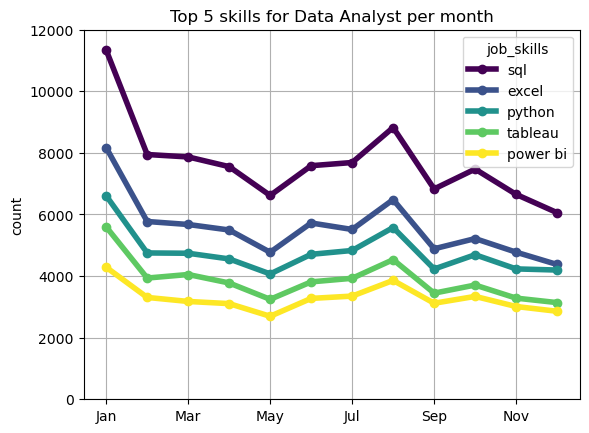

In [3]:
df_DA_pivot.iloc[:, :5].plot(
    kind = 'line',
    linewidth = 4,
    linestyle = '-',
    colormap = 'viridis',
    markersize = 6,
    marker = 'o',
    )
plt.grid(True)
plt.title('Top 5 skills for Data Analyst per month')
plt.ylim(0, 12000)
plt.xlabel('')
plt.ylabel('count')
plt.show()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import ast


df = pd.read_csv(r"C:\Users\harsh\Downloads\data_jobs.csv")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills']= df['job_skills'].apply(lambda job_skills: ast.literal_eval(job_skills) if pd.notna(job_skills) else job_skills)

df_DA = df[df['job_title_short']=='Data Analyst'].copy()

df_exploded = df_DA.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary = ('salary_year_avg','median'),
    skill_count = ('job_skills','count')
)
skill_count = 20
skill_stats = skill_stats.sort_values(by= 'skill_count', ascending=False).head(skill_count)

<function matplotlib.pyplot.show(close=None, block=None)>

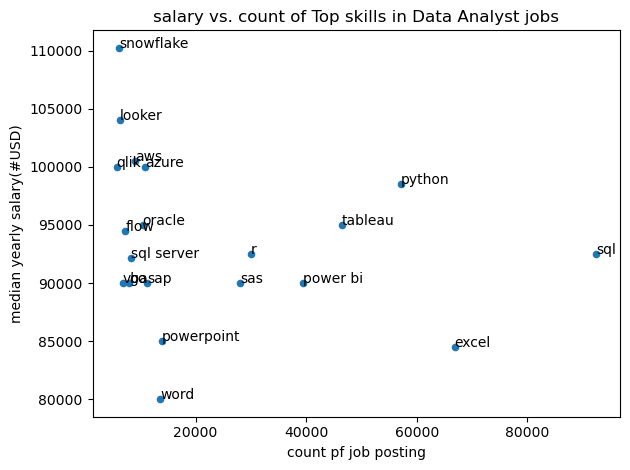

In [5]:
skill_stats.plot(kind='scatter', x= 'skill_count', y= 'median_salary')
plt.xlabel('count pf job posting')
plt.ylabel('median yearly salary(#USD)')
plt.title('salary vs. count of Top skills in Data Analyst jobs')
plt.tight_layout()
for i, txt in enumerate (skill_stats.index):
  plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

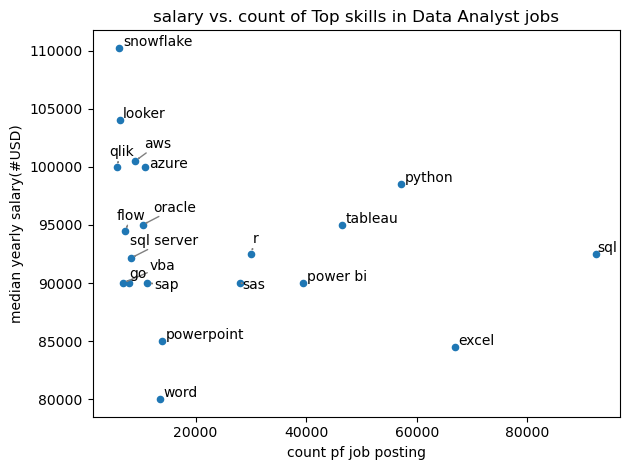

In [6]:
from adjustText import adjust_text
skill_stats.plot(kind='scatter', x= 'skill_count', y= 'median_salary')
texts = []
for i, txt in enumerate (skill_stats.index):
  texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops= dict(arrowstyle='->', color = 'grey'))
plt.xlabel('count pf job posting')
plt.ylabel('median yearly salary(#USD)')
plt.title('salary vs. count of Top skills in Data Analyst jobs')
plt.tight_layout()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

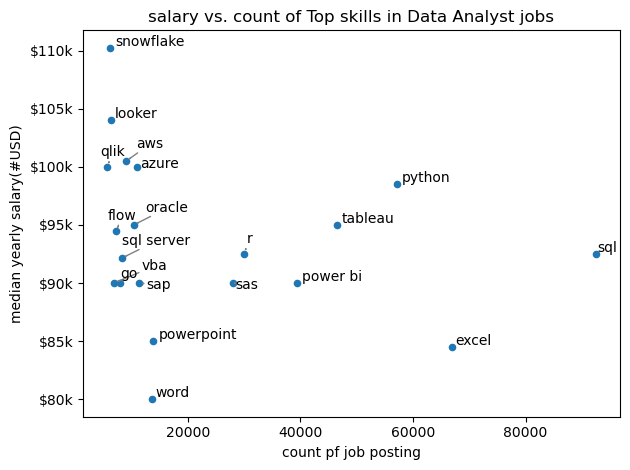

In [7]:
from adjustText import adjust_text
skill_stats.plot(kind='scatter', x= 'skill_count', y= 'median_salary')
texts = []
for i, txt in enumerate (skill_stats.index):
  texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops= dict(arrowstyle='->', color = 'grey'))
plt.xlabel('count pf job posting')
plt.ylabel('median yearly salary(#USD)')
plt.title('salary vs. count of Top skills in Data Analyst jobs')
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))
plt.tight_layout()
plt.show
